In [55]:
import numpy as np 
import pandas as pd 
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv(r'C:\Users\breast-w-699.csv',na_values='?')

In [57]:
X= df1.iloc[:,:-1]
y= df1.iloc[:,-1]

X.describe()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
#check Malignant percentage from whole dataset
sns.set_style('whitegrid')
data1= df1[df1['class']==1]
print("Malignant Percentage: ",len(data1)/len(df1) * 100)

Malignant Percentage:  51.276595744680854


In [32]:
#Split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [33]:
X_test

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
842,5,3,5,2,5,10,4,3,1
179,5,3,3,3,6,10,3,1,1
323,5,4,6,10,2,10,4,1,1
281,2,1,1,2,2,1,3,1,1
389,5,1,1,1,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...
400,3,10,8,7,6,9,9,3,8
56,8,10,10,1,3,6,3,9,1
742,10,10,10,10,5,10,7,10,4
256,3,1,1,1,2,1,1,1,1


In [34]:
y_test


842    1
179    1
323    1
281    0
389    0
      ..
400    1
56     1
742    1
256    0
937    1
Name: class, Length: 188, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
import keras
from keras.layers import Input, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, input_dim=9))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('softmax'))
model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=20, batch_size=35, validation_data=(X_test, y_test))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


Train on 752 samples, validate on 188 samples
Epoch 1/20
752/752 [==============================] - 1s 900us/step - loss: 0.6815 - accuracy: 0.9149 - val_loss: 0.6874 - val_accuracy: 0.9681
Epoch 2/20
752/752 [==============================] - 0s 125us/step - loss: 0.6599 - accuracy: 0.9721 - val_loss: 0.6787 - val_accuracy: 0.9787
Epoch 3/20
752/752 [==============================] - 0s 105us/step - loss: 0.6435 - accuracy: 0.9734 - val_loss: 0.6687 - val_accuracy: 0.9734
Epoch 4/20
752/752 [==============================] - 0s 106us/step - loss: 0.6295 - accuracy: 0.9774 - val_loss: 0.6560 - val_accuracy: 0.9734
Epoch 5/20
752/752 [==============================] - 0s 104us/step - loss: 0.6168 - accuracy: 0.9774 - val_loss: 0.6404 - val_accuracy: 0.9787
Epoch 6/20
752/752 [==============================] - 0s 102us/step - loss: 0.6044 - accuracy: 0.9774 - val_loss: 0.6240 - val_accuracy: 0.9787
Epoch 7/20
752/752 [==============================] - 0s 106us/step - loss: 0.5941 - accur

In [52]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

y_pred

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

Accuracy MLP: 0.9840425531914894


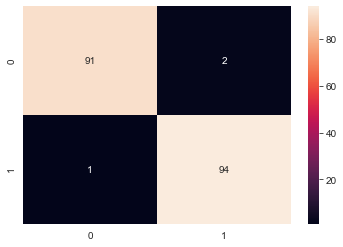

In [53]:
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm_mlp,annot=True)
#plt.savefig('mlp.png')

mlp_acc = accuracy_score(y_test, y_pred)
print("Accuracy MLP: "+ str(mlp_acc))

In [49]:
model = Sequential()
model.add(Dense(940, activation='relu', input_shape=(9,)))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))

Train on 752 samples, validate on 188 samples
Epoch 1/20
752/752 [==============================] - 0s 229us/step - loss: 7.4423 - accuracy: 0.5146 - val_loss: 7.5851 - val_accuracy: 0.5053
Epoch 2/20
752/752 [==============================] - 0s 21us/step - loss: 7.4423 - accuracy: 0.5146 - val_loss: 7.5851 - val_accuracy: 0.5053
Epoch 3/20
752/752 [==============================] - 0s 21us/step - loss: 7.4423 - accuracy: 0.5146 - val_loss: 7.5851 - val_accuracy: 0.5053
Epoch 4/20
752/752 [==============================] - 0s 21us/step - loss: 7.4423 - accuracy: 0.5146 - val_loss: 7.5851 - val_accuracy: 0.5053
Epoch 5/20
752/752 [==============================] - 0s 21us/step - loss: 7.4423 - accuracy: 0.5146 - val_loss: 7.5851 - val_accuracy: 0.5053
Epoch 6/20
752/752 [==============================] - 0s 21us/step - loss: 7.4423 - accuracy: 0.5146 - val_loss: 7.5851 - val_accuracy: 0.5053
Epoch 7/20
752/752 [==============================] - 0s 21us/step - loss: 7.4423 - accuracy: 0

Accuracy MLP: 0.5053191489361702


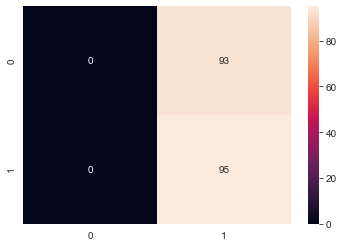

In [50]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm_mlp,annot=True)
#plt.savefig('mlp.png')

mlp_acc = accuracy_score(y_test, y_pred)
print("Accuracy MLP: "+ str(mlp_acc))
